In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer

#made Aditya Dubey
#ad440@snu.edu.in
# Importing the training set
set = pd.read_csv('data_1.csv')
training_set =  set.iloc[2:21602,1:2].values

# Feature Scaling
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
#training_set = sc.fit_transform(training_set)

training_set = np.array(training_set)

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp = imp.fit(training_set)
X_train_imp = imp.transform(training_set)


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(X_train_imp)

# Getting the inputs and the ouputs
X_train = training_set[0:21599]
y_train = training_set[1:21600]

# Reshaping
X_train = np.reshape(X_train, (21599, 1, 1))

In [2]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 50)


Using TensorFlow backend.


Epoch 1/50
21599/21599 [==============================] - 4s - loss: 0.0214     
Epoch 2/50
21599/21599 [==============================] - 2s - loss: 0.0114     
Epoch 3/50
21599/21599 [==============================] - 2s - loss: 0.0069     
Epoch 4/50
21599/21599 [==============================] - 2s - loss: 0.0049     
Epoch 5/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 6/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 7/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 8/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 9/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 10/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 11/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 12/50
21599/21599 [==============================] - 2s - loss: 0.0045     
Epoch 13/50
21599/21599 [

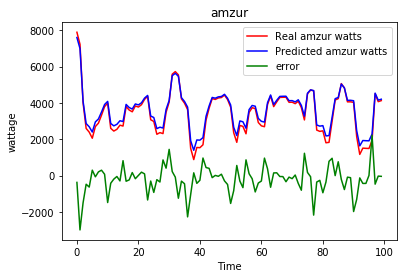

In [3]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#test_set =  set.iloc[15003:21600,1:2].values
test_set = pd.read_csv('data_2.csv')
test_set =  set.iloc[2:10002,1:2].values
real_price = np.array(test_set)
# Getting the predicted stock price of 2017
inputs = real_price
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(inputs)
inputs_imp = imp.transform(inputs)
inputs_imp = sc.transform(inputs_imp)
inputs_imp = np.reshape(inputs_imp, (10000, 1, 1))
predicted_price = regressor.predict(inputs_imp)
predicted_price = sc.inverse_transform(predicted_price)

# error for 1st 100 observation , mean error is -165.614
m = list(range(0,100))
i = 0
while i < 100:
    m[i] =  real_price[i+1] - predicted_price[i]
    i = i+1


# Visualising the results of first hundread 100 test observation
plt.plot(real_price[0:100] , color = 'red', label = 'Real amzur watts')
plt.plot(predicted_price[0:100] , color = 'blue', label = 'Predicted amzur watts')
plt.plot(m[0:100] , color = 'green', label = 'error')
plt.title('amzur')
plt.xlabel('Time')
plt.ylabel('wattage')
plt.legend()
plt.show()

In [6]:
# finding mean error (total testing data)
i = 0
z = 0 
n = 0
while i < len(real_price)-1:
    if real_price[i+1] - predicted_price[i] != np.nan:
        z = m + real_price[i+1] - predicted_price[i]
        n = n+1
    else:
        n = n+0         
    i = i+1
print('average error :', z/n)

average error : [-19.03863737]
